In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.tree import plot_tree

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load Dataset

In [11]:
df=pd.read_csv("diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Prepare Data (Clean from Day 4)

In [13]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols:
    df[c]=df[c].replace(0,np.nan)
    df[c]=df[c].fillna(df[c].median())

In [14]:
df=df.drop_duplicates()

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Prepare Features and Target

In [16]:
X=df.drop('Outcome',axis=1)

In [17]:
y=df['Outcome']

In [18]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


Apply Feature Scaling

In [19]:
scaler=StandardScaler()

In [20]:
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


Split Data into Training and Testing Sets

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape

(614, 8)

In [25]:
X_test.shape

(154, 8)

Task 1: Train K-Nearest Neighbors Model

In [26]:
knn=KNeighborsClassifier()

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn=knn.predict(X_test)

In [29]:
y_pred_knn

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [30]:
accuracy_score(y_test,y_pred_knn)

0.7337662337662337

Task 2: Tune Value of K

In [31]:
k_values=range(1,31)

In [32]:
train_scores=[]
test_scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [33]:
train_scores

[1.0,
 0.8485342019543974,
 0.8452768729641694,
 0.8110749185667753,
 0.8241042345276873,
 0.8094462540716613,
 0.8127035830618893,
 0.8078175895765473,
 0.8110749185667753,
 0.8045602605863192,
 0.8029315960912052,
 0.7964169381107492,
 0.8127035830618893,
 0.7947882736156352,
 0.7980456026058632,
 0.7915309446254072,
 0.7947882736156352,
 0.7915309446254072,
 0.7899022801302932,
 0.7915309446254072,
 0.7899022801302932,
 0.7899022801302932,
 0.7947882736156352,
 0.7850162866449512,
 0.7915309446254072,
 0.7866449511400652,
 0.7882736156351792,
 0.7817589576547231,
 0.7915309446254072,
 0.7899022801302932]

In [34]:
test_scores

[0.6558441558441559,
 0.6623376623376623,
 0.7077922077922078,
 0.7207792207792207,
 0.7337662337662337,
 0.7142857142857143,
 0.7142857142857143,
 0.7337662337662337,
 0.7272727272727273,
 0.7597402597402597,
 0.7597402597402597,
 0.7727272727272727,
 0.7597402597402597,
 0.7727272727272727,
 0.7402597402597403,
 0.7467532467532467,
 0.7597402597402597,
 0.7662337662337663,
 0.7727272727272727,
 0.7727272727272727,
 0.7662337662337663,
 0.7662337662337663,
 0.7532467532467533,
 0.7792207792207793,
 0.7532467532467533,
 0.7727272727272727,
 0.7532467532467533,
 0.7337662337662337,
 0.7272727272727273,
 0.7337662337662337]

Text(0.5, 1.0, 'KNN Performance vs K Value')

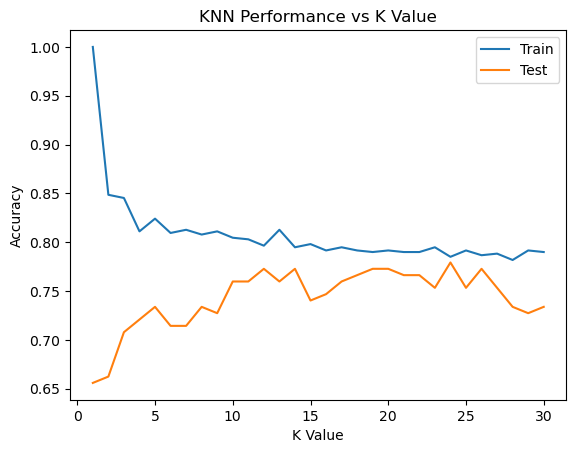

In [35]:
plt.plot(k_values,train_scores,label='Train')
plt.plot(k_values,test_scores,label='Test')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Performance vs K Value')

In [36]:
best_k=k_values[np.argmax(test_scores)]

In [37]:
best_k

24

In [38]:
max(test_scores)

0.7792207792207793

Task 3: Train KNN with Best K and Evaluate

In [39]:
knn_best=KNeighborsClassifier(n_neighbors=best_k)

In [40]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [41]:
y_pred_knn_best=knn_best.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_knn_best)

0.7792207792207793

In [43]:
confusion_matrix(y_test,y_pred_knn_best)

array([[89, 10],
       [24, 31]])

In [44]:
print(classification_report(y_test,y_pred_knn_best))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [45]:
knn_best.score(X_train,y_train)

0.7850162866449512

In [46]:
knn_best.score(X_test,y_test)

0.7792207792207793

Task 4: Train Decision Tree Classifier

In [47]:
dt=DecisionTreeClassifier()

In [48]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt=dt.predict(X_test)

In [50]:
y_pred_dt

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [51]:
dt.feature_importances_

array([0.02768022, 0.34376118, 0.07777179, 0.05064708, 0.07741922,
       0.15905303, 0.12355811, 0.14010938])

In [52]:
pd.DataFrame({'Feature':X.columns,'Importance':dt.feature_importances_}).sort_values('Importance',ascending=False)

,Feature,Importance
1,Glucose,0.343761
5,BMI,0.159053
7,Age,0.140109
6,DiabetesPedigreeFunction,0.123558
2,BloodPressure,0.077772
4,Insulin,0.077419
3,SkinThickness,0.050647
0,Pregnancies,0.027680


Task 5: Visualize and Analyze Tree Structure

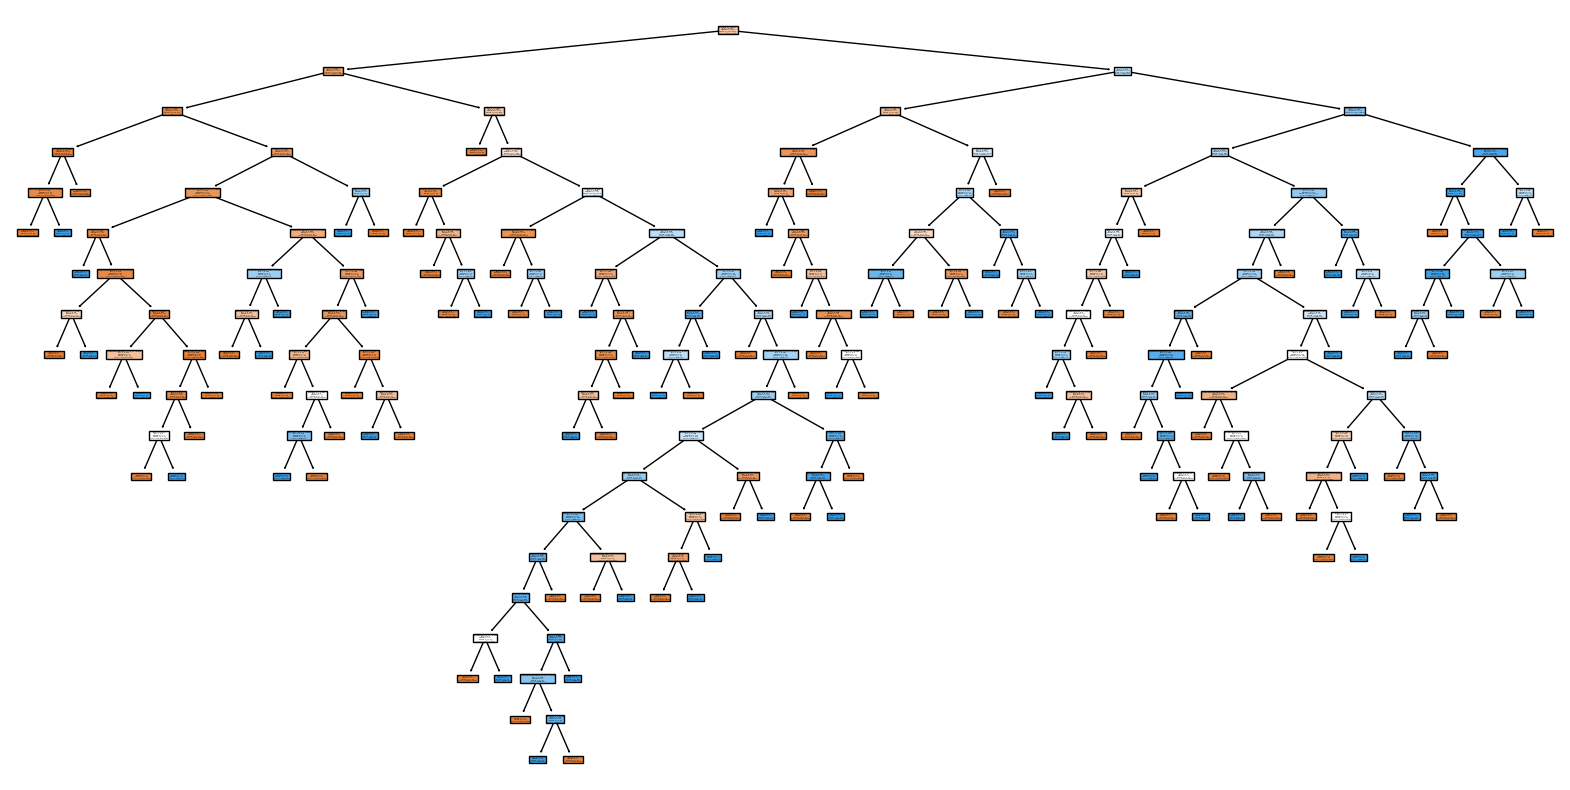

In [53]:
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=X.columns,class_names=['No Diabetes','Diabetes'],filled=True)
plt.show()

In [54]:
dt.get_depth()

18

In [55]:
dt.get_n_leaves()

np.int64(112)

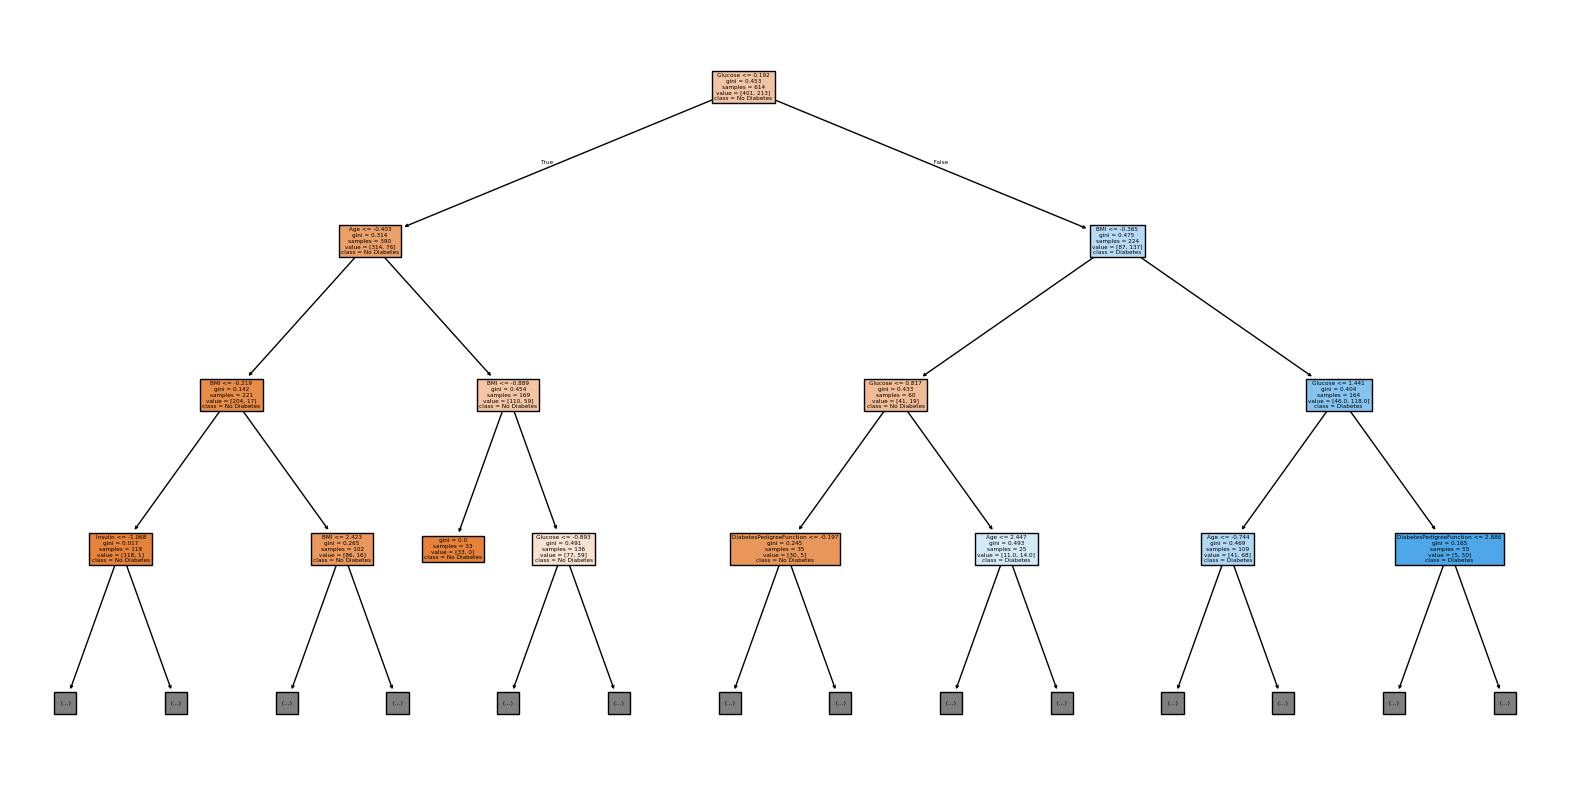

In [56]:
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=X.columns,class_names=['No Diabetes','Diabetes'],filled=True,max_depth=3)
plt.show()

Text(0.5, 1.0, 'Feature Importance - Decision Tree')

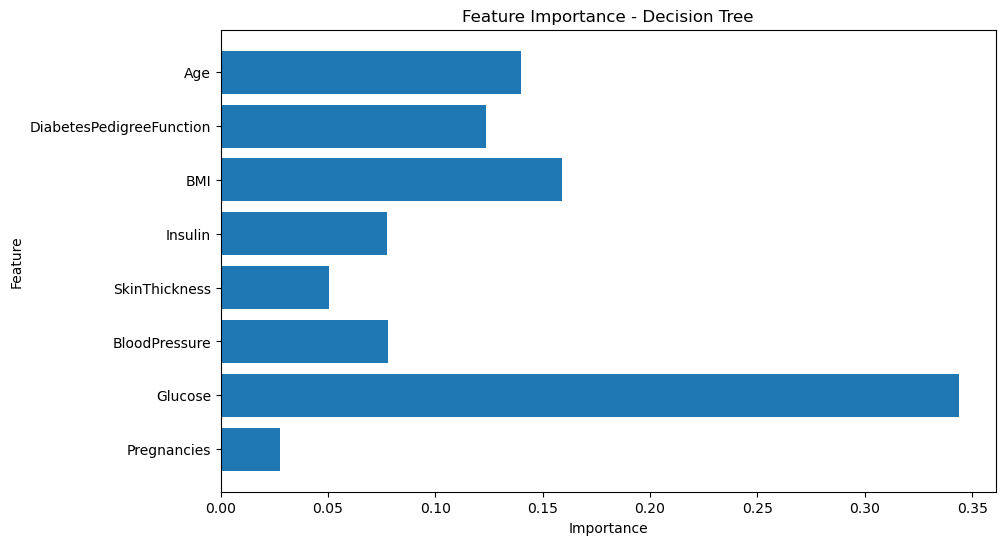

In [57]:
plt.figure(figsize=(10,6))
plt.barh(X.columns,dt.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')

Task 6: Evaluate Decision Tree Performance

In [58]:
accuracy_score(y_test,y_pred_dt)

0.6948051948051948

In [59]:
confusion_matrix(y_test,y_pred_dt)

array([[74, 25],
       [22, 33]])

In [60]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.57      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



In [61]:
dt.score(X_train,y_train)

1.0

In [62]:
dt.score(X_test,y_test)

0.6948051948051948

Compare All Models

In [63]:
models={'KNN':knn_best.score(X_test,y_test),'Decision Tree':dt.score(X_test,y_test)}

In [64]:
models

{'KNN': 0.7792207792207793, 'Decision Tree': 0.6948051948051948}

(0.6, 1.0)

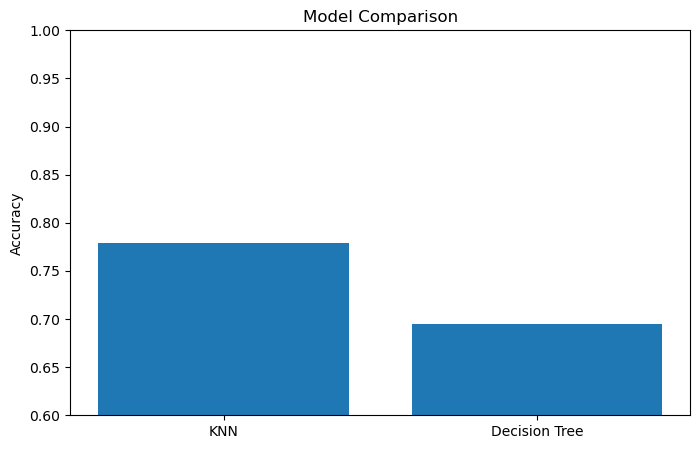

In [65]:
plt.figure(figsize=(8,5))
plt.bar(models.keys(),models.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.6,1.0)